<a href="https://colab.research.google.com/github/Zelechos/IA_Code/blob/master/SegundoParcial%20IA/Primer_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos Todas las librerias necesarias para el modelo

In [40]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [41]:
# tengo el planteamiento que se puede usar esta clase para poder hacer el tratamiento del dataset 
from PIL import Image
from os.path import join
import os
import scipy.io
import collections
import torch.utils.data as data
from torchvision.datasets.utils import download_url, list_dir, list_files
from xml.etree.ElementTree import Element as ET_Element
try:
    from defusedxml.ElementTree import parse as ET_parse
except ImportError:
    from xml.etree.ElementTree import parse as ET_parse


class BreedsDogs(data.Dataset):
    """`Stanford Dogs <http://vision.stanford.edu/aditya86/ImageNetDogs/>`_ Dataset.
    Args:
        root (string): Root directory of dataset where directory
            ``omniglot-py`` exists.
        cropped (bool, optional): If true, the images will be cropped into the bounding box specified
            in the annotations
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        download (bool, optional): If true, downloads the dataset tar files from the internet and
            puts it in root directory. If the tar files are already downloaded, they are not
            downloaded again.
    """
    folder = 'data'
    download_url_prefix = 'http://vision.stanford.edu/aditya86/ImageNetDogs'

    def __init__(self,
                 root,
                 train=True,
                 transforms=None,
                 download=False):

        self.root = join(os.path.expanduser(root), self.folder)
        # print(f"directorio raiz: {self.root}")

        self.train = train
        self.transforms = transforms

        if download:
            self.download()

        self.split = self.load_split()
        # print("Anotaciones")
        # print(self.split)

        self.images_folder = join(self.root, 'Images')
        # print(f"directorio de imagenes: {self.images_folder}")
        self.annotations_folder = join(self.root, 'Annotation')
        # print(f"directorio de anotaciones: {self.annotations_folder}")

        self._breeds = list_dir(self.images_folder)
        # print("Tipos de perros:")
        # print(self._breeds)

        self._breed_images = [(annotation+'.jpg', idx) for annotation, idx in self.split]

        # print("Imagenes por raza:")
        # print(self._breed_images[:5])

    
        self.classes = ["Chihuaha",
                        "Japanese Spaniel",
                        "Maltese Dog",
                        "Pekinese",
                        "Shih-Tzu",
                        "Blenheim Spaniel",
                        "Papillon",
                        "Toy Terrier",
                        "Rhodesian Ridgeback",
                        "Afghan Hound",
                        "Basset Hound",
                        "Beagle",
                        "Bloodhound",
                        "Bluetick",
                        "Black-and-tan Coonhound",
                        "Walker Hound",
                        "English Foxhound",
                        "Redbone",
                        "Borzoi",
                        "Irish Wolfhound",
                        "Italian Greyhound",
                        "Whippet",
                        "Ibizian Hound",
                        "Norwegian Elkhound",
                        "Otterhound",
                        "Saluki",
                        "Scottish Deerhound",
                        "Weimaraner",
                        "Staffordshire Bullterrier",
                        "American Staffordshire Terrier",
                        "Bedlington Terrier",
                        "Border Terrier",
                        "Kerry Blue Terrier",
                        "Irish Terrier",
                        "Norfolk Terrier",
                        "Norwich Terrier",
                        "Yorkshire Terrier",
                        "Wirehaired Fox Terrier",
                        "Lakeland Terrier",
                        "Sealyham Terrier",
                        "Airedale",
                        "Cairn",
                        "Australian Terrier",
                        "Dandi Dinmont",
                        "Boston Bull",
                        "Miniature Schnauzer",
                        "Giant Schnauzer",
                        "Standard Schnauzer",
                        "Scotch Terrier",
                        "Tibetan Terrier",
                        "Silky Terrier",
                        "Soft-coated Wheaten Terrier",
                        "West Highland White Terrier",
                        "Lhasa",
                        "Flat-coated Retriever",
                        "Curly-coater Retriever",
                        "Golden Retriever",
                        "Labrador Retriever",
                        "Chesapeake Bay Retriever",
                        "German Short-haired Pointer",
                        "Vizsla",
                        "English Setter",
                        "Irish Setter",
                        "Gordon Setter",
                        "Brittany",
                        "Clumber",
                        "English Springer Spaniel",
                        "Welsh Springer Spaniel",
                        "Cocker Spaniel",
                        "Sussex Spaniel",
                        "Irish Water Spaniel",
                        "Kuvasz",
                        "Schipperke",
                        "Groenendael",
                        "Malinois",
                        "Briard",
                        "Kelpie",
                        "Komondor",
                        "Old English Sheepdog",
                        "Shetland Sheepdog",
                        "Collie",
                        "Border Collie",
                        "Bouvier des Flandres",
                        "Rottweiler",
                        "German Shepard",
                        "Doberman",
                        "Miniature Pinscher",
                        "Greater Swiss Mountain Dog",
                        "Bernese Mountain Dog",
                        "Appenzeller",
                        "EntleBucher",
                        "Boxer",
                        "Bull Mastiff",
                        "Tibetan Mastiff",
                        "French Bulldog",
                        "Great Dane",
                        "Saint Bernard",
                        "Eskimo Dog",
                        "Malamute",
                        "Siberian Husky",
                        "Affenpinscher",
                        "Basenji",
                        "Pug",
                        "Leonberg",
                        "Newfoundland",
                        "Great Pyrenees",
                        "Samoyed",
                        "Pomeranian",
                        "Chow",
                        "Keeshond",
                        "Brabancon Griffon",
                        "Pembroke",
                        "Cardigan",
                        "Toy Poodle",
                        "Miniature Poodle",
                        "Standard Poodle",
                        "Mexican Hairless",
                        "Dingo",
                        "Dhole",
                        "African Hunting Dog"]
    def clase(self):
        return self.classes
        
    def __len__(self):
        return len(self._breed_images)

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target). target are the properties as annotations in image
        """
        image_name, target_class = self._breed_images[index]
        image_path = join(self.images_folder, image_name)
        image = Image.open(image_path).convert('RGB')
        target = self.parse_voc_xml(ET_parse(self.annotations_folder + '/' + self.split[index][0]).getroot())

        if self.transforms is not None:
            image, target = self.transforms(image, target)

        return image, target

        # # cargar la imágen
        # img = io.imread(self.X[ix])
        # # aplicar transformaciones
        # if self.trans:
        #   img = self.trans(image=img)["image"]
        # return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

    

    def parse_voc_xml(self, node: ET_Element):
        voc_dict = {}
        children = list(node)
        if children:
            def_dic = collections.defaultdict(list)
            for dc in map(self.parse_voc_xml, children):
                for ind, v in dc.items():
                    def_dic[ind].append(v)
            if node.tag == "annotation":
                def_dic["object"] = [def_dic["object"]]
            voc_dict = {node.tag: {ind: v[0] if len(v) == 1 else v for ind, v in def_dic.items()}}
        if node.text:
            text = node.text.strip()
            if not children:
                voc_dict[node.tag] = text
        return voc_dict

    def download(self):
        import tarfile

        if os.path.exists(join(self.root, 'Images')) and os.path.exists(join(self.root, 'Annotation')):
            if len(os.listdir(join(self.root, 'Images'))) == len(os.listdir(join(self.root, 'Annotation'))) == 120:
                print('Files already downloaded and verified')
                return

        for filename in ['images', 'annotation', 'lists']:
            tar_filename = filename + '.tar'
            url = self.download_url_prefix + '/' + tar_filename
            download_url(url, self.root, tar_filename, None)
            print('Extracting downloaded file: ' + join(self.root, tar_filename))
            with tarfile.open(join(self.root, tar_filename), 'r') as tar_file:
                tar_file.extractall(self.root)
            os.remove(join(self.root, tar_filename))

    def load_split(self):
        if self.train:
            # print(f"directorio lista de entrenamiento: {self.root}")
            split = scipy.io.loadmat(join(self.root, 'train_list.mat'))['annotation_list']
            # print(split)
            labels = scipy.io.loadmat(join(self.root, 'train_list.mat'))['labels']
            # print(labels)
        else:
            split = scipy.io.loadmat(join(self.root, 'test_list.mat'))['annotation_list']
            labels = scipy.io.loadmat(join(self.root, 'test_list.mat'))['labels']


        split = [item[0][0] for item in split]
        labels = [item[0]-1 for item in labels]
        return list(zip(split, labels))

    def stats(self):
        counts = {}
        for index in range(len(self._breed_images)):
            image_name, target_class = self._breed_images[index]
            if target_class not in counts.keys():
                counts[target_class] = 1
            else:
                counts[target_class] += 1

        print(f"{ len(self._breed_images)} samples spanning { len(counts.keys()) }  classes (avg { float(len(self._breed_images)) / float(len(counts.keys())) } % per class")

        return counts

In [42]:
# Creamos los dataset train & test
breeds_dogs_train_dataset = BreedsDogs("./content", download=True)
breeds_dogs_test_dataset = BreedsDogs("./content", train=False)
print(breeds_dogs_train_dataset[7810])

Files already downloaded and verified
(<PIL.Image.Image image mode=RGB size=500x375 at 0x7F7709175F50>, {'annotation': {'folder': '02105641', 'filename': 'n02105641_6272', 'source': {'database': 'ImageNet database'}, 'size': {'width': '500', 'height': '375', 'depth': '3'}, 'segment': '0', 'object': [{'name': 'Old_English_sheepdog', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '307', 'ymin': '147', 'xmax': '421', 'ymax': '265'}}]}})


In [43]:
# Verificamos los dos datasets train & test
print("train:\n",breeds_dogs_train_dataset.load_split())
print("test:\n",breeds_dogs_test_dataset.load_split())

train:
 [('n02085620-Chihuahua/n02085620_5927', 0), ('n02085620-Chihuahua/n02085620_4441', 0), ('n02085620-Chihuahua/n02085620_1502', 0), ('n02085620-Chihuahua/n02085620_1916', 0), ('n02085620-Chihuahua/n02085620_13151', 0), ('n02085620-Chihuahua/n02085620_1569', 0), ('n02085620-Chihuahua/n02085620_9654', 0), ('n02085620-Chihuahua/n02085620_3975', 0), ('n02085620-Chihuahua/n02085620_3942', 0), ('n02085620-Chihuahua/n02085620_9351', 0), ('n02085620-Chihuahua/n02085620_574', 0), ('n02085620-Chihuahua/n02085620_4998', 0), ('n02085620-Chihuahua/n02085620_7', 0), ('n02085620-Chihuahua/n02085620_1617', 0), ('n02085620-Chihuahua/n02085620_11140', 0), ('n02085620-Chihuahua/n02085620_5771', 0), ('n02085620-Chihuahua/n02085620_275', 0), ('n02085620-Chihuahua/n02085620_9399', 0), ('n02085620-Chihuahua/n02085620_10621', 0), ('n02085620-Chihuahua/n02085620_4266', 0), ('n02085620-Chihuahua/n02085620_7738', 0), ('n02085620-Chihuahua/n02085620_3110', 0), ('n02085620-Chihuahua/n02085620_12101', 0), ('n

In [44]:
print("longitud de datos de train:\n",len(breeds_dogs_train_dataset))
print("longitud de datos de test:\n",len(breeds_dogs_test_dataset))

longitud de datos de train:
 12000
longitud de datos de test:
 8580


In [45]:
# Mostramos las clases que tiene el dataset train
classes_breed_dogs = []

for eds in breeds_dogs_train_dataset:
  img, label = eds
  anns = label['annotation']['object']
  if type(anns) is not list:
    anns = [anns]
  for ann in anns:
    if ann['name'] not in classes_breed_dogs:
        classes_breed_dogs.append(str(ann['name'])) 

print(len(classes_breed_dogs))

120


In [46]:
voc_classes = ['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier', 'Lhasa', 'flat-coated_retriever', 'curly-coated_retriever', 'golden_retriever', 'Labrador_retriever', 'Chesapeake_Bay_retriever', 'German_short-haired_pointer', 'vizsla', 'English_setter', 'Irish_setter', 'Gordon_setter', 'Brittany_spaniel', 'clumber', 'English_springer', 'Welsh_springer_spaniel', 'cocker_spaniel', 'Sussex_spaniel', 'Irish_water_spaniel', 'kuvasz', 'schipperke', 'groenendael', 'malinois', 'briard', 'kelpie', 'komondor', 'Old_English_sheepdog', 'Shetland_sheepdog', 'collie', 'Border_collie', 'Bouvier_des_Flandres', 'Rottweiler', 'German_shepherd', 'Doberman', 'miniature_pinscher', 'Greater_Swiss_Mountain_dog', 'Bernese_mountain_dog', 'Appenzeller', 'EntleBucher', 'boxer', 'bull_mastiff', 'Tibetan_mastiff', 'French_bulldog', 'Great_Dane', 'Saint_Bernard', 'Eskimo_dog', 'malamute', 'Siberian_husky', 'affenpinscher', 'basenji', 'pug', 'Leonberg', 'Newfoundland', 'Great_Pyrenees', 'Samoyed', 'Pomeranian', 'chow', 'keeshond', 'Brabancon_griffon', 'Pembroke', 'Cardigan', 'toy_poodle', 'miniature_poodle', 'standard_poodle', 'Mexican_hairless', 'dingo', 'dhole', 'African_hunting_dog']
print(voc_classes.index("Chihuahua"))

0


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import random

def get_sample(ix):
  img, label = breeds_dogs_train_dataset[ix]
  img_np = np.array(img)
  anns = label['annotation']['object']
 
  if type(anns) is not list:
    anns = [anns]
  labels = np.array([voc_classes.index(ann['name']) for ann in anns])
  bbs = [ann['bndbox'] for ann in anns]
  bbs = np.array([[int(bb['xmin']), int(bb['ymin']),int(bb['xmax'])-int(bb['xmin']),int(bb['ymax'])-int(bb['ymin'])] for bb in bbs])
  anns = (labels, bbs)
  return img_np, anns

def plot_anns(img, anns, ax=None, bg=-1, classes=voc_classes):
  # anns is a tuple with (labels, bbs)
  # bbs is an array of bounding boxes in format [x_min, y_min, width, height] 
  # labels is an array containing the label 
  if not ax:
    fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(img)
  labels, bbs = anns
  for lab, bb in zip(labels, bbs):
    if bg == -1 or lab != bg:
      x, y, w, h = bb
      rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
      text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
      text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
      ax.add_patch(rect)

In [68]:
img_np, anns = get_sample(0)
print(img_np)
print("--"*20)
print(anns)

[[30 23  5]
 [30 23  5]
 [30 23  5]
 ...
 [65 49 13]
 [65 49 13]
 [65 49 13]]
----------------------------------------
(array([0]), array([[ 30,  14, 206, 284]]))


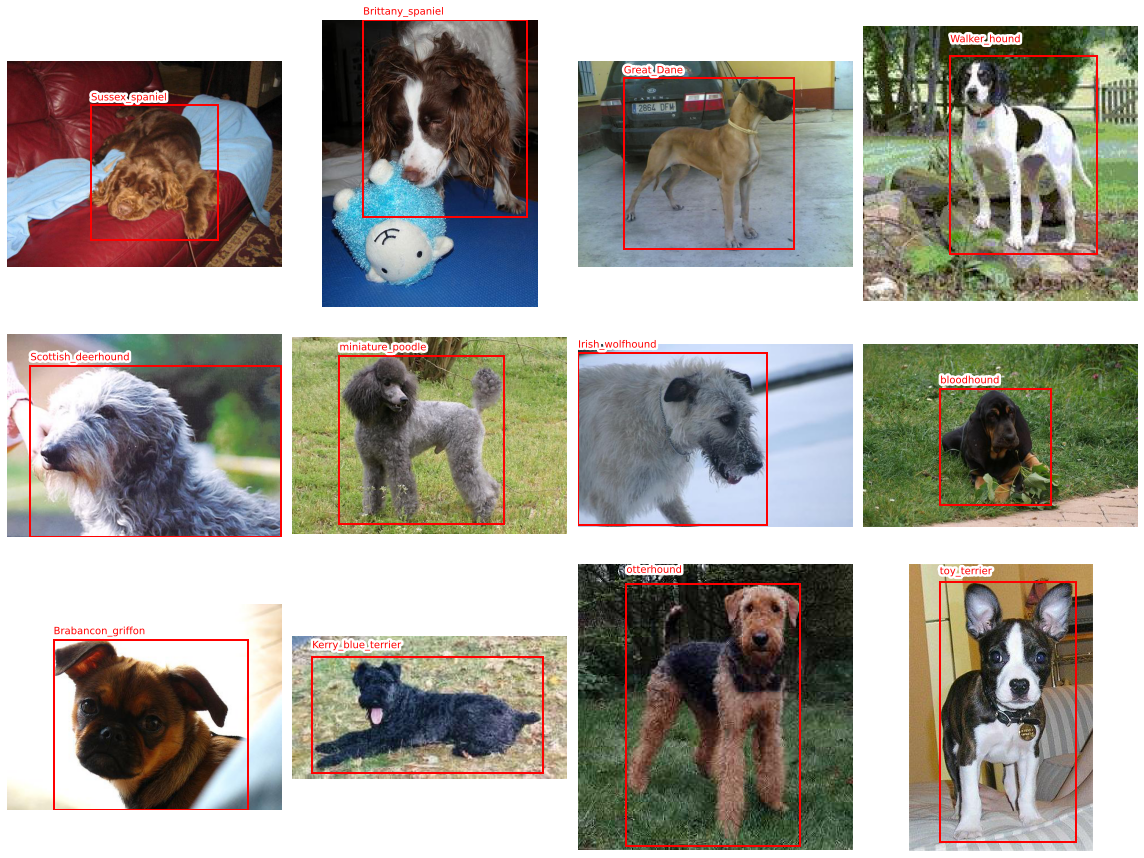

In [50]:
r, c = 3, 4
fig = plt.figure(figsize=(4*c, 4*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(breeds_dogs_train_dataset)-1)
        img_np, anns = get_sample(ix)
        plot_anns(img_np, anns, ax)
        plt.axis("off")
plt.tight_layout()
plt.show()

In [69]:
import torch
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

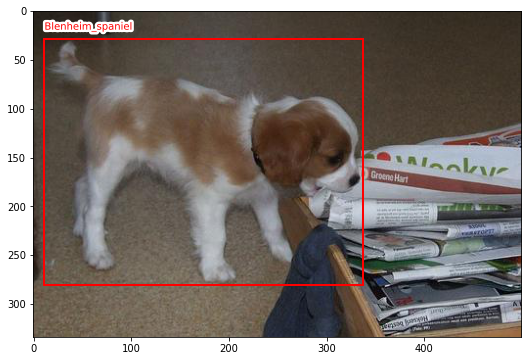

In [71]:
img_np, anns = get_sample(545)
plot_anns(img_np, anns)
plt.show()


In [81]:
import os 
PATH = '/content/content/data/Images'
classes = os.listdir(PATH)
print(len(classes))

imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab.split("-")}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

print(imgs[0])


print(labels)

120
Categoría: ['n02088364', 'beagle']. Imágenes: 195
Categoría: ['n02096051', 'Airedale']. Imágenes: 202
Categoría: ['n02106030', 'collie']. Imágenes: 153
Categoría: ['n02102177', 'Welsh_springer_spaniel']. Imágenes: 150
Categoría: ['n02088094', 'Afghan_hound']. Imágenes: 239
Categoría: ['n02096177', 'cairn']. Imágenes: 197
Categoría: ['n02087046', 'toy_terrier']. Imágenes: 172
Categoría: ['n02086910', 'papillon']. Imágenes: 196
Categoría: ['n02092002', 'Scottish_deerhound']. Imágenes: 232
Categoría: ['n02106662', 'German_shepherd']. Imágenes: 152
Categoría: ['n02104365', 'schipperke']. Imágenes: 154
Categoría: ['n02111500', 'Great_Pyrenees']. Imágenes: 213
Categoría: ['n02098413', 'Lhasa']. Imágenes: 186
Categoría: ['n02098286', 'West_Highland_white_terrier']. Imágenes: 169
Categoría: ['n02093754', 'Border_terrier']. Imágenes: 172
Categoría: ['n02105162', 'malinois']. Imágenes: 150
Categoría: ['n02094114', 'Norfolk_terrier']. Imágenes: 172
Categoría: ['n02115641', 'dingo']. Imágenes:

In [83]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)


(16464, 4116)

In [84]:
import torch
from skimage import io


class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [85]:


import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

# Creamos nuestro dataset para crear porteriormente nuestro dataloader
dataset = {
    
    # 'train': breeds_dogs_train_dataset.load_split(),
    # 'test': breeds_dogs_test_dataset.load_split()

    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])


(16464, 4116)

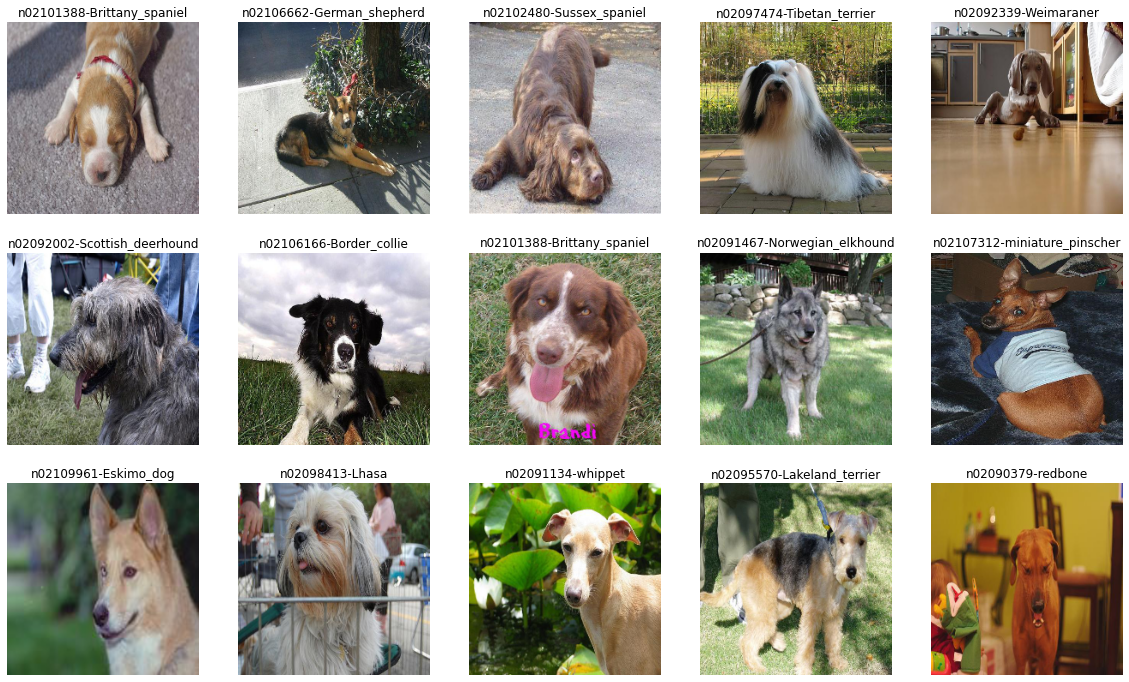

In [86]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10*2,6*2))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [87]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

In [88]:
class Model(torch.nn.Module):
  def __init__(self, n_outputs=5, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)

    # self.resnet.fc.out_features = 120

    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])


    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    
    # self.resnet.fc = torch.nn.Linear(512, 120)

    self.fc = torch.nn.Linear(512, 120)

  def forward(self, x):
    x = self.resnet(x)
    print(x.shape)
    x = x.view(x.shape[0], -1)
    print(x.shape)
    x = self.fc(x)
    print(x.shape)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

  def resnetinfo(self):
      print(self.resnet)

In [89]:
model = Model()
model.resnetinfo()
outputs = model(torch.randn(64, 3, 224, 224))
outputs.shape

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

torch.Size([64, 120])

In [90]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [92]:
model = Model()
fit(model, dataloader, epochs=1)



  0%|          | 0/258 [00:00<?, ?it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.99733 acc 0.00000:   0%|          | 0/258 [00:00<?, ?it/s]

loss 4.99733 acc 0.00000:   0%|          | 1/258 [00:00<02:31,  1.69it/s]

loss 4.93907 acc 0.00000:   0%|          | 1/258 [00:01<02:31,  1.69it/s]

loss 4.93907 acc 0.00000:   1%|          | 2/258 [00:01<02:24,  1.77it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.91077 acc 0.00000:   1%|          | 2/258 [00:01<02:24,  1.77it/s]

loss 4.91077 acc 0.00000:   1%|          | 3/258 [00:01<02:20,  1.82it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.91228 acc 0.00000:   1%|          | 3/258 [00:02<02:20,  1.82it/s]

loss 4.91228 acc 0.00000:   2%|▏         | 4/258 [00:02<02:14,  1.88it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.89563 acc 0.00000:   2%|▏         | 4/258 [00:02<02:14,  1.88it/s]

loss 4.89563 acc 0.00000:   2%|▏         | 5/258 [00:02<02:10,  1.94it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.90407 acc 0.00260:   2%|▏         | 5/258 [00:03<02:10,  1.94it/s]

loss 4.90407 acc 0.00260:   2%|▏         | 6/258 [00:03<02:08,  1.96it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.89328 acc 0.00223:   2%|▏         | 6/258 [00:03<02:08,  1.96it/s]

loss 4.89328 acc 0.00223:   3%|▎         | 7/258 [00:03<02:05,  2.00it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.88909 acc 0.00391:   3%|▎         | 7/258 [00:04<02:05,  2.00it/s]

loss 4.88909 acc 0.00391:   3%|▎         | 8/258 [00:04<02:03,  2.03it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.88681 acc 0.00521:   3%|▎         | 8/258 [00:04<02:03,  2.03it/s]

loss 4.88681 acc 0.00521:   3%|▎         | 9/258 [00:04<02:01,  2.05it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.88228 acc 0.00469:   3%|▎         | 9/258 [00:04<02:01,  2.05it/s]

loss 4.88228 acc 0.00469:   4%|▍         | 10/258 [00:04<02:00,  2.06it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.87476 acc 0.00426:   4%|▍         | 10/258 [00:05<02:00,  2.06it/s]

loss 4.87476 acc 0.00426:   4%|▍         | 11/258 [00:05<02:00,  2.05it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.86827 acc 0.00391:   4%|▍         | 11/258 [00:05<02:00,  2.05it/s]

loss 4.86827 acc 0.00391:   5%|▍         | 12/258 [00:05<01:58,  2.07it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.87316 acc 0.00361:   5%|▍         | 12/258 [00:06<01:58,  2.07it/s]

loss 4.87316 acc 0.00361:   5%|▌         | 13/258 [00:06<01:59,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.87109 acc 0.00558:   5%|▌         | 13/258 [00:06<01:59,  2.04it/s]

loss 4.87109 acc 0.00558:   5%|▌         | 14/258 [00:06<01:59,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.86334 acc 0.00625:   5%|▌         | 14/258 [00:07<01:59,  2.04it/s]

loss 4.86334 acc 0.00625:   6%|▌         | 15/258 [00:07<01:58,  2.05it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.86426 acc 0.00586:   6%|▌         | 15/258 [00:07<01:58,  2.05it/s]

loss 4.86426 acc 0.00586:   6%|▌         | 16/258 [00:07<01:57,  2.06it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.86070 acc 0.00551:   6%|▌         | 16/258 [00:08<01:57,  2.06it/s]

loss 4.86070 acc 0.00551:   7%|▋         | 17/258 [00:08<01:56,  2.06it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.86038 acc 0.00608:   7%|▋         | 17/258 [00:08<01:56,  2.06it/s]

loss 4.86038 acc 0.00608:   7%|▋         | 18/258 [00:08<01:55,  2.08it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85751 acc 0.00658:   7%|▋         | 18/258 [00:09<01:55,  2.08it/s]

loss 4.85751 acc 0.00658:   7%|▋         | 19/258 [00:09<01:58,  2.01it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85470 acc 0.00625:   7%|▋         | 19/258 [00:09<01:58,  2.01it/s]

loss 4.85470 acc 0.00625:   8%|▊         | 20/258 [00:09<01:59,  2.00it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85384 acc 0.00744:   8%|▊         | 20/258 [00:10<01:59,  2.00it/s]

loss 4.85384 acc 0.00744:   8%|▊         | 21/258 [00:10<01:58,  2.00it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85261 acc 0.00710:   8%|▊         | 21/258 [00:10<01:58,  2.00it/s]

loss 4.85261 acc 0.00710:   9%|▊         | 22/258 [00:10<02:00,  1.96it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85272 acc 0.00747:   9%|▊         | 22/258 [00:11<02:00,  1.96it/s]

loss 4.85272 acc 0.00747:   9%|▉         | 23/258 [00:11<01:58,  1.99it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.85090 acc 0.00716:   9%|▉         | 23/258 [00:11<01:58,  1.99it/s]

loss 4.85090 acc 0.00716:   9%|▉         | 24/258 [00:11<01:58,  1.98it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84970 acc 0.00688:   9%|▉         | 24/258 [00:12<01:58,  1.98it/s]

loss 4.84970 acc 0.00688:  10%|▉         | 25/258 [00:12<01:57,  1.99it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84819 acc 0.00661:  10%|▉         | 25/258 [00:12<01:57,  1.99it/s]

loss 4.84819 acc 0.00661:  10%|█         | 26/258 [00:12<01:56,  1.99it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84502 acc 0.00694:  10%|█         | 26/258 [00:13<01:56,  1.99it/s]

loss 4.84502 acc 0.00694:  10%|█         | 27/258 [00:13<01:55,  2.01it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84332 acc 0.00670:  10%|█         | 27/258 [00:13<01:55,  2.01it/s]

loss 4.84332 acc 0.00670:  11%|█         | 28/258 [00:13<01:54,  2.01it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84220 acc 0.00647:  11%|█         | 28/258 [00:14<01:54,  2.01it/s]

loss 4.84220 acc 0.00647:  11%|█         | 29/258 [00:14<01:54,  2.00it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84184 acc 0.00625:  11%|█         | 29/258 [00:14<01:54,  2.00it/s]

loss 4.84184 acc 0.00625:  12%|█▏        | 30/258 [00:14<01:53,  2.01it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84082 acc 0.00605:  12%|█▏        | 30/258 [00:15<01:53,  2.01it/s]

loss 4.84082 acc 0.00605:  12%|█▏        | 31/258 [00:15<01:52,  2.02it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84033 acc 0.00635:  12%|█▏        | 31/258 [00:15<01:52,  2.02it/s]

loss 4.84033 acc 0.00635:  12%|█▏        | 32/258 [00:15<01:51,  2.03it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.84091 acc 0.00616:  12%|█▏        | 32/258 [00:16<01:51,  2.03it/s]

loss 4.84091 acc 0.00616:  13%|█▎        | 33/258 [00:16<01:50,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83977 acc 0.00597:  13%|█▎        | 33/258 [00:16<01:50,  2.04it/s]

loss 4.83977 acc 0.00597:  13%|█▎        | 34/258 [00:16<01:49,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83796 acc 0.00580:  13%|█▎        | 34/258 [00:17<01:49,  2.04it/s]

loss 4.83796 acc 0.00580:  14%|█▎        | 35/258 [00:17<01:50,  2.02it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83741 acc 0.00564:  14%|█▎        | 35/258 [00:17<01:50,  2.02it/s]

loss 4.83741 acc 0.00564:  14%|█▍        | 36/258 [00:17<01:49,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83581 acc 0.00549:  14%|█▍        | 36/258 [00:18<01:49,  2.04it/s]

loss 4.83581 acc 0.00549:  14%|█▍        | 37/258 [00:18<01:48,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83406 acc 0.00699:  14%|█▍        | 37/258 [00:18<01:48,  2.04it/s]

loss 4.83406 acc 0.00699:  15%|█▍        | 38/258 [00:18<01:47,  2.05it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83297 acc 0.00721:  15%|█▍        | 38/258 [00:19<01:47,  2.05it/s]

loss 4.83297 acc 0.00721:  15%|█▌        | 39/258 [00:19<01:50,  1.98it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83231 acc 0.00742:  15%|█▌        | 39/258 [00:19<01:50,  1.98it/s]

loss 4.83231 acc 0.00742:  16%|█▌        | 40/258 [00:19<01:47,  2.03it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83173 acc 0.00762:  16%|█▌        | 40/258 [00:20<01:47,  2.03it/s]

loss 4.83173 acc 0.00762:  16%|█▌        | 41/258 [00:20<01:46,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83179 acc 0.00781:  16%|█▌        | 41/258 [00:20<01:46,  2.04it/s]

loss 4.83179 acc 0.00781:  16%|█▋        | 42/258 [00:20<01:44,  2.06it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.82996 acc 0.00799:  16%|█▋        | 42/258 [00:21<01:44,  2.06it/s]

loss 4.82996 acc 0.00799:  17%|█▋        | 43/258 [00:21<01:44,  2.06it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83065 acc 0.00781:  17%|█▋        | 43/258 [00:21<01:44,  2.06it/s]

loss 4.83065 acc 0.00781:  17%|█▋        | 44/258 [00:21<01:44,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.83033 acc 0.00764:  17%|█▋        | 44/258 [00:22<01:44,  2.04it/s]

loss 4.83033 acc 0.00764:  17%|█▋        | 45/258 [00:22<01:44,  2.05it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.82779 acc 0.00781:  17%|█▋        | 45/258 [00:22<01:44,  2.05it/s]

loss 4.82779 acc 0.00781:  18%|█▊        | 46/258 [00:22<01:42,  2.07it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.82755 acc 0.00765:  18%|█▊        | 46/258 [00:23<01:42,  2.07it/s]

loss 4.82755 acc 0.00765:  18%|█▊        | 47/258 [00:23<01:43,  2.04it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])




loss 4.82628 acc 0.00781:  18%|█▊        | 47/258 [00:23<01:43,  2.04it/s]

loss 4.82628 acc 0.00781:  19%|█▊        | 48/258 [00:23<01:44,  2.02it/s]

torch.Size([64, 512, 1, 1])
torch.Size([64, 512])
torch.Size([64, 120])


RuntimeError: ignored